## Testing staircase

In [1]:
from moisture_rnn import staircase, staircase_2
import numpy as np
from data_funcs import plot_data

2024-01-08 00:56:53.771910: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# training data shape   [batches,batch_size, sequence_length, features] 
# also called           [samples,timesteps,features]
# input data size       [trainsteps,features] 

In [3]:
datapoints=10
timesteps=3
features=1
outputs=1
x=np.tile(range(datapoints), (features, 1)).T
y=np.tile(range(datapoints), (outputs, 1)).T
# print('x =',x)
print('x shape =',x.shape)
# print('y =',y)
print('y shape =',y.shape)

x shape = (10, 1)
y shape = (10, 1)


In [4]:
# the original staircase, offset by one, all in one batch, no hidden state passed
x_train, y_train = staircase(x,y,timesteps,datapoints,return_sequences=False, verbose = True)
print('x_train shape =',x_train.shape)
print('y_train shape =',y_train.shape)
# print('x_train =',x_train)
# print('y_train =',y_train)


staircase: shape x =  (10, 1)
staircase: shape y =  (10, 1)
staircase: timesteps= 3
staircase: datapoints= 10
staircase: return_sequences= False
staircase: samples= 8 timesteps= 3 features= 1
returning only the last timestep in a sample
x_train shape = (8, 3, 1)
y_train shape = (8, 1)


In [5]:
# new staircase, hidden state passed between batches
x_train, y_train = staircase_2(x,y,timesteps,batch_size=3,return_sequences=False, verbose = True)
print('x_train shape =',x_train.shape)
print('y_train shape =',y_train.shape)
print('x_train =',x_train)
print('y_train =',y_train)

staircase_2: shape x =  (10, 1)
staircase_2: shape y =  (10, 1)
staircase_2: timesteps= 3
staircase_2: batch_size= 3
staircase_2: return_sequences= False
staircase_2: datapoints= 10
staircase_2: max_batches= 3
staircase_2: max_sequences= 9
sequence 0 batch 0 sample 0 data 0 to 2
sequence 1 batch 0 sample 1 data 1 to 3
sequence 2 batch 0 sample 2 data 2 to 4
sequence 3 batch 1 sample 0 data 3 to 5
sequence 4 batch 1 sample 1 data 4 to 6
sequence 5 batch 1 sample 2 data 5 to 7
sequence 6 batch 2 sample 0 data 6 to 8
sequence 7 batch 2 sample 1 data 7 to 9
staircase_2: shape x_train =  (9, 3, 1)
staircase_2: shape y_train =  (9, 1)
staircase_2: sequences generated 8
staircase_2: batch_size= 3
staircase_2: removing partial and empty batches at the end, keeping 6
staircase_2: shape x_train =  (6, 3, 1)
staircase_2: shape y_train =  (6, 1)
x_train shape = (6, 3, 1)
y_train shape = (6, 1)
x_train = [[[0.]
  [1.]
  [2.]]

 [[1.]
  [2.]
  [3.]]

 [[2.]
  [3.]
  [4.]]

 [[3.]
  [4.]
  [5.]]

 [[

## Testing RNN training on time lag problem

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, SimpleRNN
from data_funcs import plot_data

# Generate sample time series data (replace with your actual data)
hours = 500  #Ensure divisible by batch size and lookback
x = 10*(1+np.cos(np.linspace(0, hours, hours)*2*np.pi/24))  # daily
x = x+5*np.exp(np.sin(np.linspace(0, hours, hours)*2*np.pi/240))# 10 day cycle
x = x + 1.0*np.random.randn(*x.shape) # random
x = x/35
y = np.zeros((hours))
z = np.zeros((hours))
for i in range(1,hours):
    y[i] = y[i-1] + (x[i-1] - y[i-1])/10.
    z[i] = z[i-1] + (x[i-1] - z[i-1])/3.
y = (y + z)/2
x=np.reshape(x,[-1,1])
y=np.reshape(y,[-1,1])
print('x.shape',x.shape)
print('y.shape',y.shape)

x.shape (500, 1)
y.shape (500, 1)


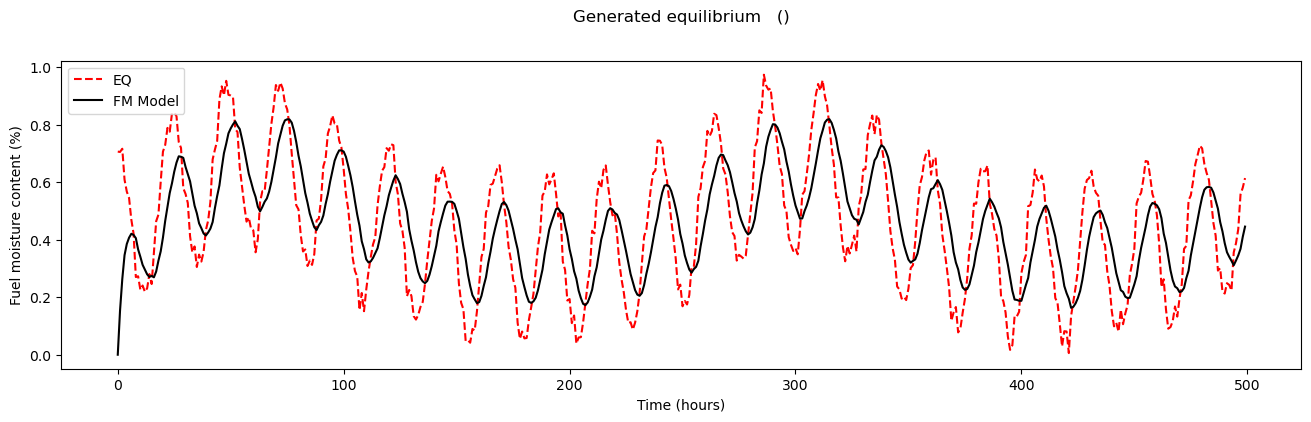

In [7]:
plot_data({'E':x,'m':y},title="Generated equilibrium  ")

In [8]:
# Create training data with lookback, offset by one, all one batch
x_train, y_train = [], []
timesteps = 10
for i in range(len(x) - timesteps):
    x_train.append(x[i:i+timesteps])  # Create sequences of 5 timesteps
    y_train.append(y[i+timesteps])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape input data for RNN
x_train = x_train.reshape(-1, timesteps, 1)  # Print x_train.shape to verify
print(x_train)
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)

[[[0.70650346]
  [0.70528828]
  [0.71648457]
  ...
  [0.42106182]
  [0.27017285]
  [0.2728623 ]]

 [[0.70528828]
  [0.71648457]
  [0.60886899]
  ...
  [0.27017285]
  [0.2728623 ]
  [0.22603182]]

 [[0.71648457]
  [0.60886899]
  [0.56725066]
  ...
  [0.2728623 ]
  [0.22603182]
  [0.24068982]]

 ...

 [[0.29261608]
  [0.30092427]
  [0.21965074]
  ...
  [0.35574961]
  [0.38807919]
  [0.43685487]]

 [[0.30092427]
  [0.21965074]
  [0.21281244]
  ...
  [0.38807919]
  [0.43685487]
  [0.55747157]]

 [[0.21965074]
  [0.21281244]
  [0.2488089 ]
  ...
  [0.43685487]
  [0.55747157]
  [0.58131308]]]
x_train.shape (490, 10, 1)
y_train.shape (490, 1)


In [9]:
batch_size=32
x_train, y_train = staircase_2(x,y,timesteps,batch_size,return_sequences=False, verbose = True)

staircase_2: shape x =  (500, 1)
staircase_2: shape y =  (500, 1)
staircase_2: timesteps= 10
staircase_2: batch_size= 32
staircase_2: return_sequences= False
staircase_2: datapoints= 500
staircase_2: max_batches= 50
staircase_2: max_sequences= 1600
sequence 0 batch 0 sample 0 data 0 to 9
sequence 1 batch 0 sample 1 data 1 to 10
sequence 2 batch 0 sample 2 data 2 to 11
sequence 3 batch 0 sample 3 data 3 to 12
sequence 4 batch 0 sample 4 data 4 to 13
sequence 5 batch 0 sample 5 data 5 to 14
sequence 6 batch 0 sample 6 data 6 to 15
sequence 7 batch 0 sample 7 data 7 to 16
sequence 8 batch 0 sample 8 data 8 to 17
sequence 9 batch 0 sample 9 data 9 to 18
sequence 10 batch 0 sample 10 data 10 to 19
sequence 11 batch 0 sample 11 data 11 to 20
sequence 12 batch 0 sample 12 data 12 to 21
sequence 13 batch 0 sample 13 data 13 to 22
sequence 14 batch 0 sample 14 data 14 to 23
sequence 15 batch 0 sample 15 data 15 to 24
sequence 16 batch 0 sample 16 data 16 to 25
sequence 17 batch 0 sample 17 data

In [18]:
from keras.callbacks import Callback

class ResetStatesCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        self.model.reset_states()
        
from tensorflow.keras.optimizers import Adam

# Instantiate an optimizer with a custom learning rate
optimizer = Adam(learning_rate=0.001)  

# Define the stateful RNN model
RNN=SimpleRNN
#RNN=LSTM
#RNN=GRU
epochs=50
activation='tanh'
activation='linear'
cells=1
training = 2

model = Sequential()
model.add(RNN(cells, stateful=True, batch_input_shape=(batch_size, timesteps, 1),activation=activation))  
model.add(Dense(1))  # Output layer for single-value prediction
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model (manual state resetting)'print('x_train.shape',x_train.shape)
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)

if training == 1:
    for i in range(epochs):
        model.fit(x_train, y_train, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
elif training == 2:
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=False, 
              callbacks=[ResetStatesCallback()])
elif training == 3:
    sequences = x_train.shape[0]
    batches = sequences // batch_size
    print('x_train has',sequences,'sequences',batches,'batches')
    for i in range(epochs):
        for j in range(batches):
            print('iteration',i,'batch',j,'size',batch_size)
            batch_start = j*batch_size
            batch_next = batch_start + batch_size 
            model.fit(x_train[batch_start:batch_next], y_train[batch_start:batch_next], 
                      epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()  # at the end of each iteration = epoch
else:
    raise ValueError('training must be 1 or 2 or 3')
# print('weights',model.get_weights())

x_train.shape (1536, 10, 1)
y_train.shape (1536, 1)
Epoch 1/50
48/48 [==============================] - 1s 2ms/step - loss: 0.9271
Epoch 2/50
48/48 [==============================] - 0s 2ms/step - loss: 0.7791
Epoch 3/50
48/48 [==============================] - 0s 2ms/step - loss: 0.6178
Epoch 4/50
48/48 [==============================] - 0s 2ms/step - loss: 0.4953
Epoch 5/50
48/48 [==============================] - 0s 2ms/step - loss: 0.4000
Epoch 6/50
48/48 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 7/50
48/48 [==============================] - 0s 2ms/step - loss: 0.2652
Epoch 8/50
48/48 [==============================] - 0s 2ms/step - loss: 0.2185
Epoch 9/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1821
Epoch 10/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1542
Epoch 11/50
48/48 [==============================] - 0s 2ms/step - loss: 0.1331
Epoch 12/50
48/48 [==============================] - 0s 2ms/step - loss: 0.11

16/16 [==============================] - 0s 1ms/step


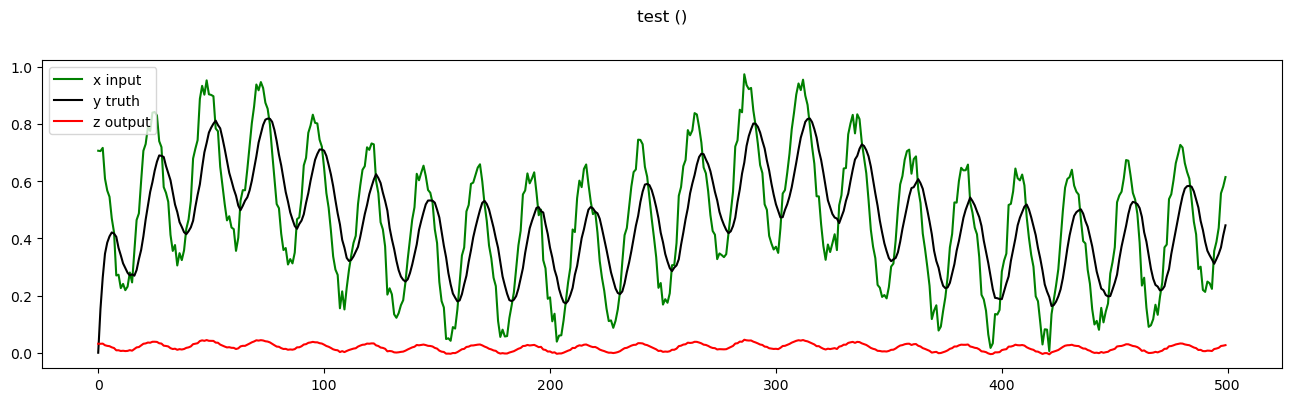

In [11]:
# Define the stateless RNN model - to be used on data in a single sequence
model2 = Sequential()
model2.add(RNN(cells, stateful=False,input_shape=(None,1),activation=activation)) 
model2.add(Dense(1))  # Output layer for single-value prediction
model2.compile(loss='mean_squared_error', optimizer='adam')

# transfer weights, predict, plot
w=model.get_weights()
model2.set_weights(w)
z = model2.predict(x.reshape((-1,1))) # inout and output need to be shape (-1,1), ie columns
plot_data({'x':x,'y':y,'z':z},xlabel='',ylabel='',title='test')

In [12]:
# testing scope
def sub():
    print(__name__)
    print(a)
a = 1
sub()
sub()

__main__
1
__main__
1


In [13]:
import inspect

def my_function():
    print("The current function name is:", inspect.currentframe().f_code.co_name)
    caller_name = inspect.stack()[1][3]
    print('The caller name is:',caller_name)

def caller():
    my_function()
    
caller()


The current function name is: my_function
The caller name is: caller


In [14]:
from utils import get_item
dict={'a':1}
print(get_item(dict,'a',default=None))
print(get_item(dict,'b',default=None))


<module> : a = 1
1
<module> : b = None
None


In [15]:
import utils

In [16]:
k=90
batch_size=32
k = (k // batch_size) * batch_size
print(k)

64
